# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

**Industrial Production: Manufacturing: Non-Durable Goods: Ice Cream and Frozen Dessert (NAICS = 31152)**<br>
**Endüstriyel Üretim: İmalat: Dayanıksız Mallar: Dondurma ve Dondurulmuş Tatlı**

## Import Libraries

In [2]:
# Source : DL-S12 (RNN_project_Bike_Sharing_Demand_Prediction-store_sharing) 10 Nov 2021 (in-class)
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [1]:
# Source : Aksakallılar
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

## Indest Data

In [9]:
df = pd.read_csv("Frozen_Dessert_Production.csv", parse_dates=['DATE'], index_col="DATE")

In [10]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [11]:
# Some useful functions
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
missing_values(df)

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
first_looking(df)

Shape:(573, 1)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB
None
-------------------------------------------------------------------------------
Number of Uniques:
IPN31152N    573
dtype: int64
-------------------------------------------------------------------------------
Missing Values:
Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []
-------------------------------------------------------------------------------
All Columns:['IPN31152N']
-------------------------------------------------------------------------------
Columns after rename:['ipn31152n']
-------------------------------------------------------------------------------


In [12]:
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}",
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')
multicolinearity_control(df)

In [13]:
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
drop_columns(df,[])

We will now check the missing values and if necessary will drop related columns!
-------------------------------------------------------------------------------


In [14]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
    print('New shape after missing value control:', df.shape)
drop_null(df, 90)

Shape: (573, 1)
New shape after missing value control: (573, 1)


In [27]:
def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
duplicate_values(df)

Duplicate check...
There are no duplicates
-------------------------------------------------------------------------------


In [15]:
df.head()

,ipn31152n
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [16]:
df.tail()

,ipn31152n
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [41]:
df.sample(7)

,ipn31152n
DATE,
2013-07-01,112.369
2016-06-01,132.987
2001-08-01,134.775
2000-10-01,113.734
1986-08-01,119.079
1999-05-01,116.280
1995-03-01,138.876


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipn31152n  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [26]:
df.isnull().sum().any()

False

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ipn31152n,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


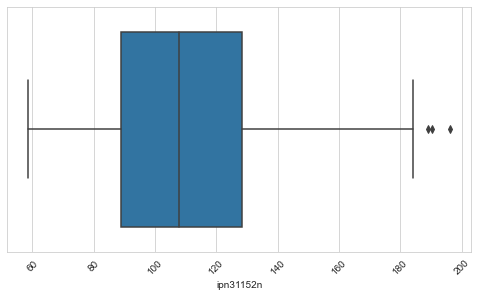

In [29]:
index = 0
plt.figure(figsize=(20,20))
for col in df.select_dtypes(include=[np.number]).columns[:14]:
    index += 1
    plt.subplot(5,3,index)
    sns.boxplot(x=col, data=df, whis=1.5)
    plt.xticks(rotation = 45)
    plt.tight_layout()

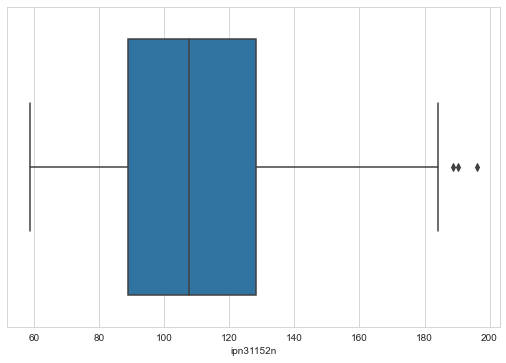

In [33]:
def boxplotit(data,x=3,y=3,drops=[]):
    index = 0
    plt.figure(figsize=(30,20))
    for feature in df.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x,y,index)
        sns.boxplot(x=feature, data=df, whis=1.5)
boxplotit(df)

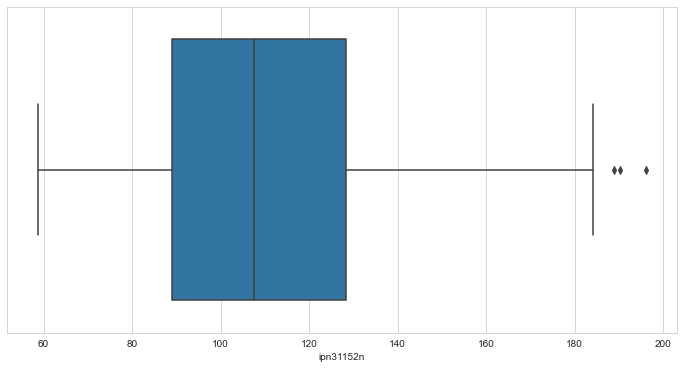

In [46]:
sns.boxplot(x= "ipn31152n", data=df);

## Preprocessing of Data

### Train Test Split

In [34]:
len(df)

573

In [48]:
len(df) - 24  # 12 (ay) de bir tekrar ediyor data, o yüzden 12 den daha büyük seçmek gerek.

549

In [49]:
test_size = 24
test_size

24

In [50]:
train = 573 - 24
train

549

In [51]:
test_ind = len(df)- test_size
test_ind

549

In [52]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
len(train), len(test)

(549, 24)

In [54]:
train.head(7)

,ipn31152n
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126


In [55]:
test.head(7)

,ipn31152n
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431


### Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [59]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [73]:
length = 12  # döngü
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)  # batch_size

- **STRATO**
- The batch size limits the number of samples to be shown to the network before a weight update can be performed. This same limitation is then imposed when making predictions with the fit model. Specifically, the batch size used when fitting your model controls how many predictions you must make at a time.


In [74]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [66]:
train_scaled[12]

array([0.01774221])

In [67]:
generator[1]

(array([[[0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221]]]),
 array([[0.09850931]]))

In [68]:
train_scaled[13]

array([0.09850931])

In [70]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

### Creating Model

### with "tanh" activation function

**NEDEN TANH**<br>
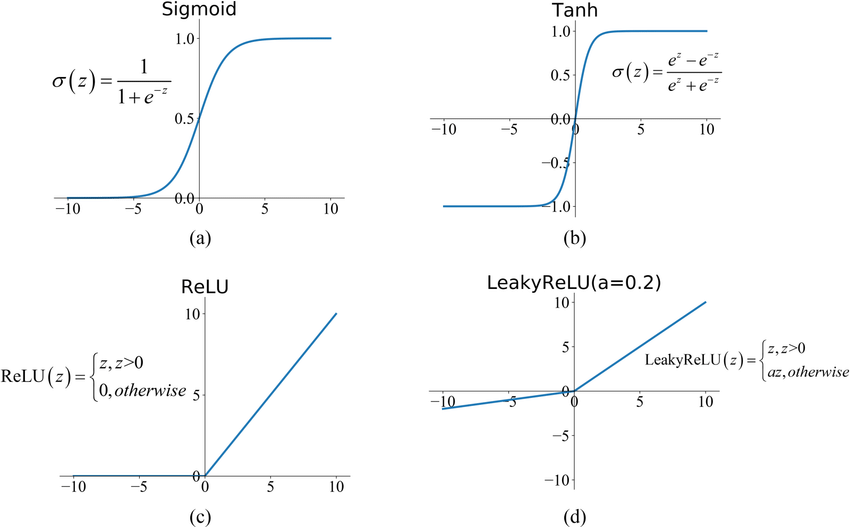

In [76]:
n_features = 1  # feature sayımız bir, yani bir sütunumuz var.

In [91]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))  # neden tanh, neden LSTM (4 gates)
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and Validation Generator

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [95]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [96]:
len(validation_generator)  # sor, bu olmadan model fit edilir mi?

12

In [97]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 13s 17ms/step - loss: 0.0198 - val_loss: 0.0030TA - ETA: 1s - loss - ETA:
Epoch 2/20
537/537 [==============================] - 9s 16ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 3/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 4/20
537/537 [==============================] - 9s 16ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 5/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 6/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 7/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 8/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 9/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 10/20
537/537 [==============================] - 8s 14ms/

In [98]:
model.history.history

{'loss': [0.019771633669734,
  0.005641237832605839,
  0.004557150881737471,
  0.004037049133330584,
  0.003669808153063059,
  0.0036994952242821455,
  0.0034523415379226208,
  0.0034337909892201424,
  0.003278256393969059,
  0.0031242494005709887,
  0.0030066268518567085,
  0.0028557078912854195,
  0.002788072917610407,
  0.0026358545292168856,
  0.002609842224046588,
  0.0026010137517005205,
  0.0024875705130398273,
  0.0024865753948688507,
  0.002482666401192546,
  0.002588004805147648],
 'val_loss': [0.0030038373079150915,
  0.0025156002957373857,
  0.0021226590033620596,
  0.0020468903239816427,
  0.0018955073319375515,
  0.002932608127593994,
  0.002037051832303405,
  0.002160044154152274,
  0.0024118234869092703,
  0.001982904737815261,
  0.002449854277074337,
  0.0017877955688163638,
  0.0022376931738108397,
  0.001980840228497982,
  0.0021025033202022314,
  0.003464585868641734,
  0.002057810081169009,
  0.003296870971098542,
  0.003888218430802226,
  0.001780823920853436]}

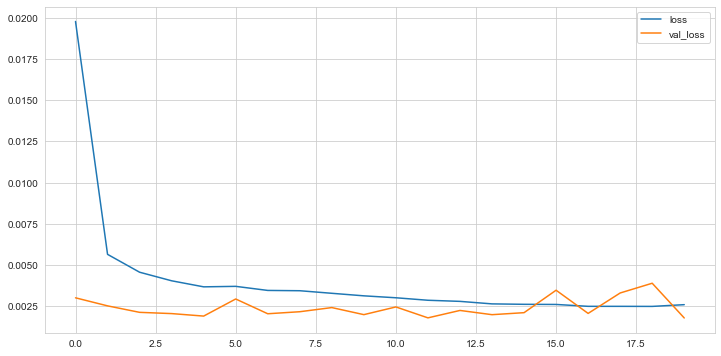

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [102]:
y_pred = model.predict(validation_generator)  # valid generator 24-12 = 12 taneydi
# son 24 taneyi kontrol için ayırdık, ve bu 24 tane içinden stride 1 olacak şekilde 12 ler halinde 12 tane çıktı aldı olay aslında bu.

In [103]:
y_pred

array([[0.24406803],
       [0.1928251 ],
       [0.1806279 ],
       [0.20553972],
       [0.29702705],
       [0.3325021 ],
       [0.4130848 ],
       [0.4462333 ],
       [0.44877762],
       [0.44485468],
       [0.33095378],
       [0.25348017]], dtype=float32)

In [104]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8370351885209023 
 mae: 0.03185839596370316 
 mse: 0.0017808241644552455 
 rmse: 0.04219981237464505


In [107]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [110]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.034091279501221705 
 mae: 0.08615959495889747 
 mse: 0.011304677654852371 
 rmse: 0.10632345768856641


#### Inverse Transformations and Comparing

In [111]:
true_predictions = scaler.inverse_transform(test_predictions)

In [112]:
test['Predictions'] = true_predictions

In [113]:
test

,ipn31152n,Predictions
DATE,,
2017-10-01,90.473,92.145
2017-11-01,77.438,90.834
2017-12-01,75.812,96.822
2018-01-01,83.434,106.827
2018-02-01,99.490,113.908
2018-03-01,107.315,118.520
2018-04-01,112.431,122.946
2018-05-01,110.354,125.062
2018-06-01,124.584,122.918


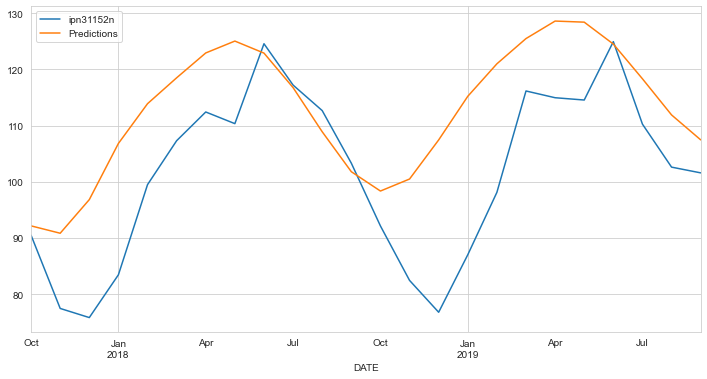

In [114]:
test.plot();

#### Calculation R2 Score and Error Metrics

In [116]:
eval_metrics(test.ipn31152n, test.Predictions)

r2_score: 0.034091279501222815 
 mae: 11.848141925218323 
 mse: 213.7722762265649 
 rmse: 14.620953328239747


### with "relu" activation function

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [118]:
n_features = 1

In [119]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1))  # 2 değeri karşılaştıracağım için çıkış layer ında 1 nöron olmalı.
model.compile(optimizer = 'adam', loss = 'mse')

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [123]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [124]:
len(validation_generator)

# 24-12 = 12 tane 

# son 24 taneyi test için ayırdık, bunların içinden stride 1 olacak şekilde 
  # 12 lik gruplar halinde ve kaydıra kaydıra işlem yaparak 12 tane değer üretti.

12

In [125]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 13s 18ms/step - loss: 0.0234 - val_loss: 0.0049
Epoch 2/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0093 - val_loss: 0.0053
Epoch 3/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0046 - val_loss: 0.0039oss: 0.0
Epoch 5/20
537/537 [==============================] - 10s 18ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 6/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 7/20
537/537 [==============================] - 8s 14ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 8/20
537/537 [==============================] - 7s 14ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 9/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 10/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0

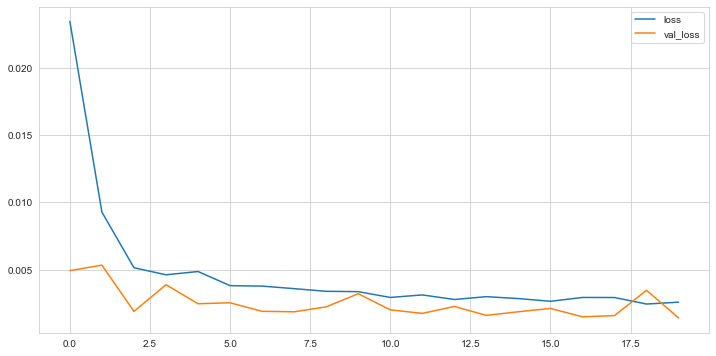

In [127]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [129]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [130]:
y_pred = model.predict(validation_generator)

In [131]:
y_pred

array([[0.24303219],
       [0.18011129],
       [0.1578627 ],
       [0.18234758],
       [0.2749306 ],
       [0.34678125],
       [0.4215813 ],
       [0.44529808],
       [0.44621328],
       [0.4422471 ],
       [0.35381564],
       [0.26853713]], dtype=float32)

In [132]:
test_scaled[-12:]

array([[0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [133]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8699490113567202 
 mae: 0.03105056242993291 
 mse: 0.0014211530764538863 
 rmse: 0.037698183994111525


In [134]:
test_predictions = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [135]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.7239004512630096 
 mae: 0.048880418847888664 
 mse: 0.003231378217095023 
 rmse: 0.05684521278960105


**SONUC : TANH ile tahmin iyi bir şeçim değildi.(Bu data için)**

#### Inverse Transformations and Comparing

In [136]:
true_predictions = scaler.inverse_transform(test_predictions)

In [137]:
test['Predictions'] = true_predictions

In [138]:
test

,ipn31152n,Predictions
DATE,,
2017-10-01,90.473,93.270
2017-11-01,77.438,87.649
2017-12-01,75.812,88.496
2018-01-01,83.434,96.591
2018-02-01,99.490,107.407
2018-03-01,107.315,115.381
2018-04-01,112.431,120.623
2018-05-01,110.354,122.419
2018-06-01,124.584,121.608


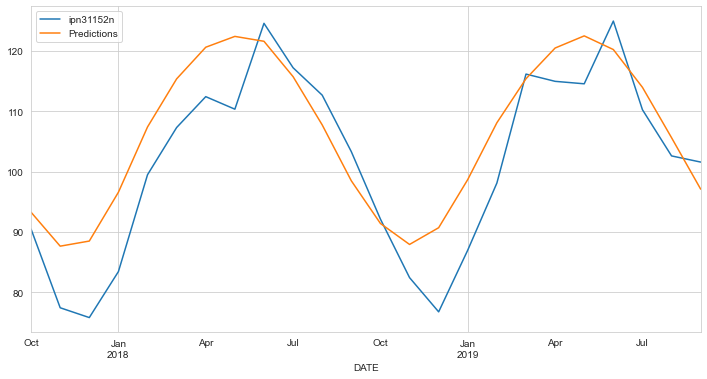

In [139]:
test.plot();

#### Calculation R2 Score and Error Metrics

In [141]:
eval_metrics(test.ipn31152n, test.Predictions)

r2_score: 0.7239004512630101 
 mae: 6.721737029406675 
 mse: 61.105596984522144 
 rmse: 7.817006907027916


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [142]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [143]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [144]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 13s 17ms/step - loss: 0.0189 0s - loss: 0
Epoch 2/15
561/561 [==============================] - 9s 17ms/step - loss: 0.0075
Epoch 3/15
561/561 [==============================] - 10s 18ms/step - loss: 0.0054
Epoch 4/15
561/561 [==============================] - 10s 18ms/step - loss: 0.0052
Epoch 5/15
561/561 [==============================] - 9s 17ms/step - loss: 0.0047 ETA: 0s - loss:
Epoch 6/15
561/561 [==============================] - 9s 16ms/step - loss: 0.0041
Epoch 7/15
561/561 [==============================] - 8s 14ms/step - loss: 0.0037
Epoch 8/15
561/561 [==============================] - 8s 13ms/step - loss: 0.0038
Epoch 9/15
561/561 [==============================] - 7s 12ms/step - loss: 0.0035
Epoch 10/15
561/561 [==============================] - 8s 13ms/step - loss: 0.0035
Epoch 11/15
561/561 [==============================] - 8s 14ms/step - loss: 0.0032
Epoch 12/15
561/561 [==============================] - 7s 13ms/s

In [145]:
scaled_full_data.shape

(573, 1)

In [146]:
scaled_full_data[-length:].shape

(12, 1)

In [147]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:] 
# tüm datamın son 12 ye 1 lik kısmını aldım. artık bunu ileriye doğru predict te (forecast) kullanıcam
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)
    
# Burada tüm datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. 
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp forecast e kaydettim.

In [148]:
forecast = scaler.inverse_transform(forecast)

In [149]:
forecast

array([[ 88.09072759],
       [ 80.39449492],
       [ 77.51281378],
       [ 82.46969697],
       [ 92.2728725 ],
       [100.85153273],
       [106.13543856],
       [109.80498052],
       [111.70985998],
       [107.70051708],
       [101.62215638],
       [ 92.89264427]])

In [150]:
df

,ipn31152n
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [153]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [154]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [155]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

# forecast lerden dataframe oluşturduk

In [156]:
forecast_df

,Forecast
2019-10-01,88.091
2019-11-01,80.394
2019-12-01,77.513
2020-01-01,82.470
2020-02-01,92.273
2020-03-01,100.852
2020-04-01,106.135
2020-05-01,109.805
2020-06-01,111.710
2020-07-01,107.701


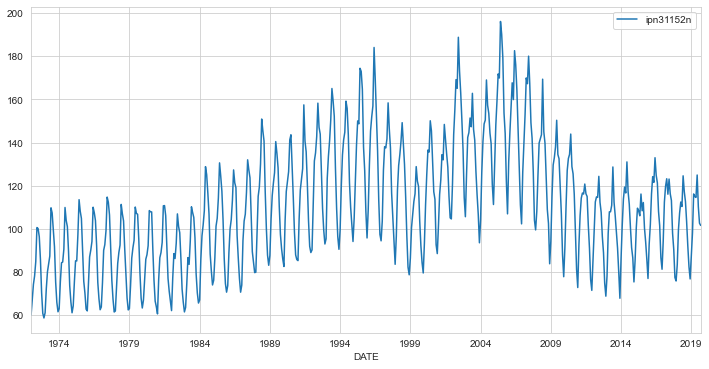

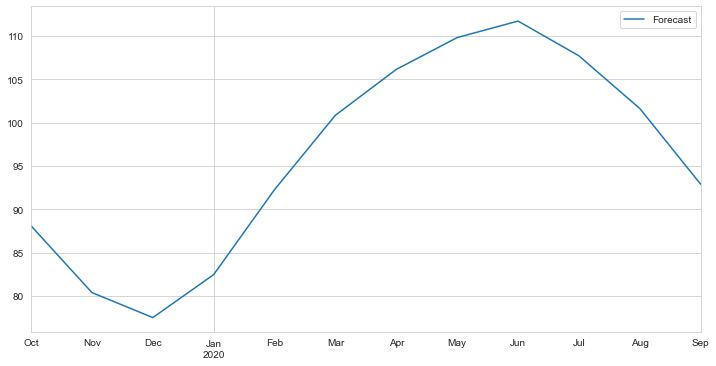

In [158]:
df.plot()
forecast_df.plot();

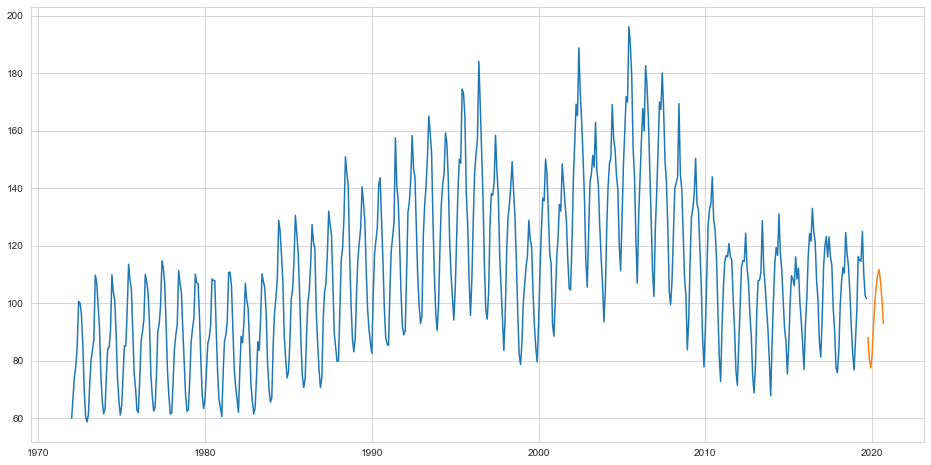

In [160]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['ipn31152n'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

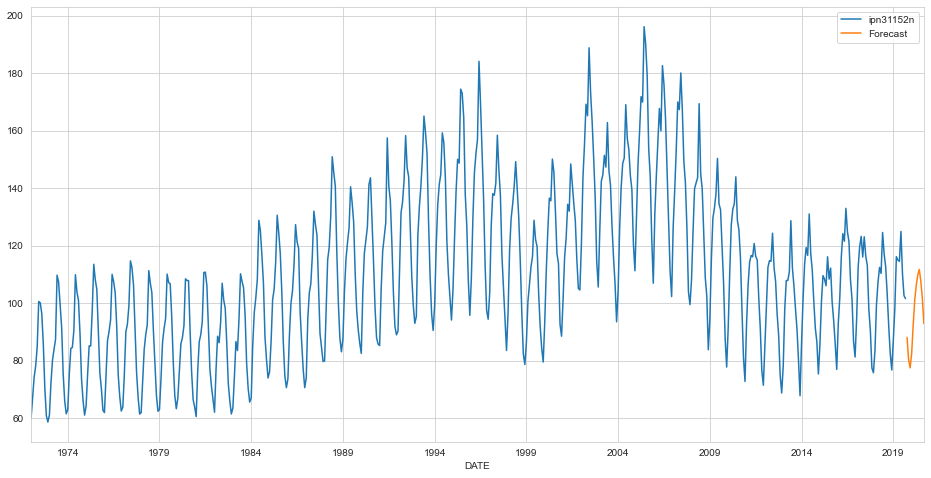

In [161]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));


(576.0, 611.0)

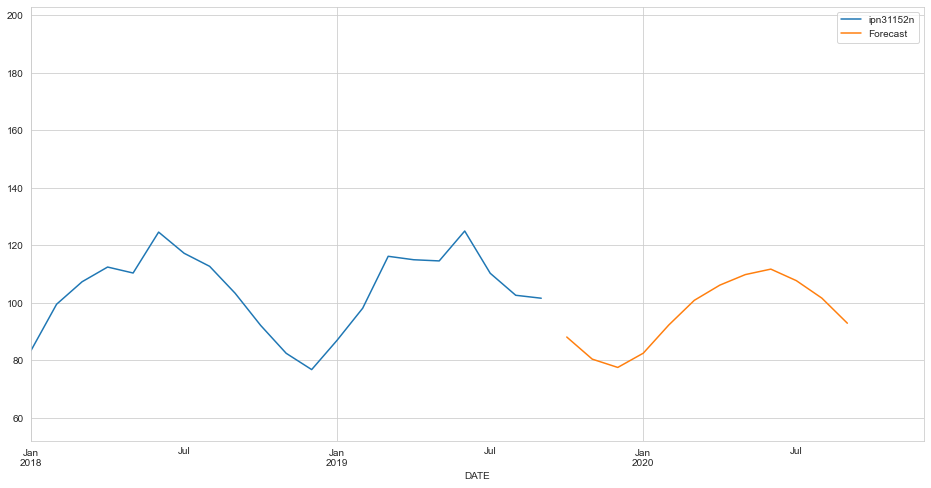

In [162]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')